<span style="background-color:#f6f8fa">last updated : 2022-Oct-26 / Daegun Kim (daegunkim0425@gmail.com)</span>

# 00_Timm_intro

**Reference**
- timm git hub: https://github.com/rwightman/pytorch-image-models/tree/main
- timm documentation: https://rwightman.github.io/pytorch-image-models/feature_extraction/
- Medium : https://towardsdatascience.com/getting-started-with-pytorch-image-models-timm-a-practitioners-guide-4e77b4bf9055

**Environments**
* Timm 0.6.11
* Python 3.8.15

Timm released in PYPI
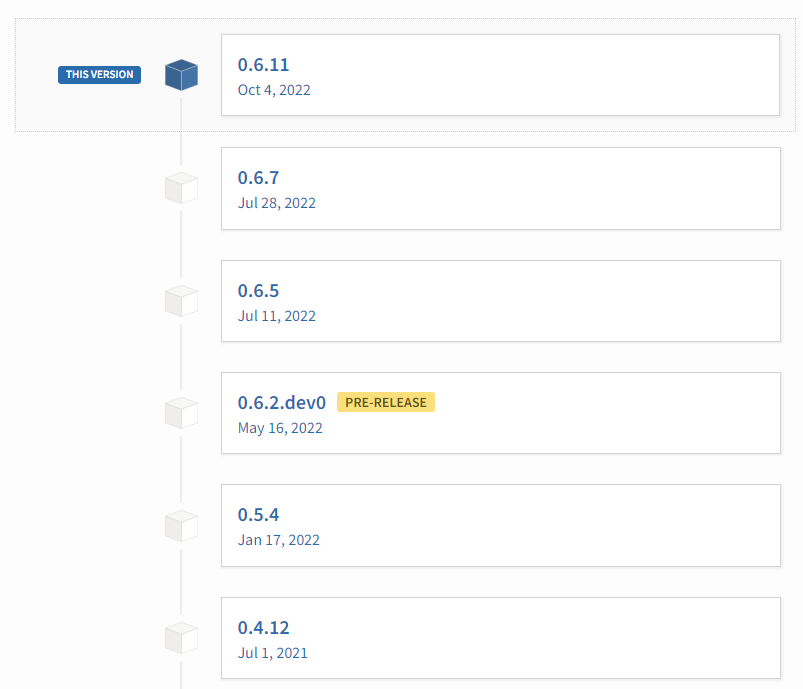

## 0. What is timm

> Py**T**orch **Im**age **M**odels (timm) is a collection of image models, layers, utilities, optimizers, schedulers, data-loaders / augmentations, and reference training / validation scripts  
that aim to pull together a wide variety of SOTA models with ability to reproduce ImageNet training results.


### 0.1 Install and import packages

In [2]:
!python -m pip install timm
!python -m pip install ipywidgets

In [3]:
# import packages
import timm
import torch
import random
import numpy as np
import os
import cv2
import pandas as pd

from tqdm import tqdm
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from copy import deepcopy
from pprint import pprint
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt

In [4]:
!python -m pip install matplotlib

In [5]:
# Check timm version
timm.__version__

'0.6.11'

## 1. Timm Models

### 1.1 Choose a model in timm

In [6]:
# How many models in timm?
print(f'Number of models in timm: {len(timm.list_models())}')
timm.list_models()[:20]

Number of models in timm: 964


['adv_inception_v3',
 'bat_resnext26ts',
 'beit_base_patch16_224',
 'beit_base_patch16_224_in22k',
 'beit_base_patch16_384',
 'beit_large_patch16_224',
 'beit_large_patch16_224_in22k',
 'beit_large_patch16_384',
 'beit_large_patch16_512',
 'beitv2_base_patch16_224',
 'beitv2_base_patch16_224_in22k',
 'beitv2_large_patch16_224',
 'beitv2_large_patch16_224_in22k',
 'botnet26t_256',
 'botnet50ts_256',
 'cait_m36_384',
 'cait_m48_448',
 'cait_s24_224',
 'cait_s24_384',
 'cait_s36_384']

In [7]:
# Show certain kinds of models
timm.list_models('effi*', pretrained=True)

['efficientformer_l1',
 'efficientformer_l3',
 'efficientformer_l7',
 'efficientnet_b0',
 'efficientnet_b1',
 'efficientnet_b1_pruned',
 'efficientnet_b2',
 'efficientnet_b2_pruned',
 'efficientnet_b3',
 'efficientnet_b3_pruned',
 'efficientnet_b4',
 'efficientnet_el',
 'efficientnet_el_pruned',
 'efficientnet_em',
 'efficientnet_es',
 'efficientnet_es_pruned',
 'efficientnet_lite0',
 'efficientnetv2_rw_m',
 'efficientnetv2_rw_s',
 'efficientnetv2_rw_t']

### 1.2 How to create model by timm

In [8]:
!python -m pip install torchsummary

In [9]:
timm_test_model = timm.create_model('efficientnet_b0', pretrained=True)

In [10]:
timm_test_model.default_cfg

{'url': 'https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/efficientnet_b0_ra-3dd342df.pth',
 'num_classes': 1000,
 'input_size': (3, 224, 224),
 'pool_size': (7, 7),
 'crop_pct': 0.875,
 'interpolation': 'bicubic',
 'mean': (0.485, 0.456, 0.406),
 'std': (0.229, 0.224, 0.225),
 'first_conv': 'conv_stem',
 'classifier': 'classifier',
 'architecture': 'efficientnet_b0'}

In [11]:
timm_test_model

EfficientNet(
  (conv_stem): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (bn1): BatchNormAct2d(
    32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
    (drop): Identity()
    (act): SiLU(inplace=True)
  )
  (blocks): Sequential(
    (0): Sequential(
      (0): DepthwiseSeparableConv(
        (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
        (bn1): BatchNormAct2d(
          32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
          (drop): Identity()
          (act): SiLU(inplace=True)
        )
        (se): SqueezeExcite(
          (conv_reduce): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
          (act1): SiLU(inplace=True)
          (conv_expand): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
          (gate): Sigmoid()
        )
        (conv_pw): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn2): BatchNormAct2d(
      

In [12]:
# Random sampling timm models
timm_some_models = []
for nm in tqdm(random.sample(timm.list_models(), 30)):
    timm_some_models.append(timm.create_model(nm))

 67%|██████▋   | 20/30 [00:53<00:50,  5.04s/it]/usr/local/lib/python3.8/site-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
100%|██████████| 30/30 [01:06<00:00,  2.21s/it]


In [13]:
# Easy to compare and choose models by timm model default cfg
[mdl.default_cfg['input_size'] for mdl in timm_some_models]

[(3, 256, 256),
 (3, 256, 256),
 (3, 240, 240),
 (3, 672, 672),
 (3, 384, 384),
 (3, 256, 256),
 (3, 384, 384),
 (3, 224, 224),
 (3, 224, 224),
 (3, 256, 256),
 (3, 224, 224),
 (3, 600, 600),
 (3, 224, 224),
 (3, 224, 224),
 (3, 224, 224),
 (3, 299, 299),
 (3, 224, 224),
 (3, 224, 224),
 (3, 800, 800),
 (3, 480, 480),
 (3, 224, 224),
 (3, 256, 256),
 (3, 224, 224),
 (3, 224, 224),
 (3, 224, 224),
 (3, 224, 224),
 (3, 224, 224),
 (3, 256, 256),
 (3, 260, 260),
 (3, 224, 224)]

### 1.3 Simple customization of timm models

In [14]:
# Load model w/o num_classes
timm_test_model.classifier

Linear(in_features=1280, out_features=1000, bias=True)

In [15]:
# Load model w/ fixed num_classes
timm_custom_model = timm.create_model('efficientnet_b0', pretrained=True, num_classes=3)
timm_custom_model.classifier

Linear(in_features=1280, out_features=3, bias=True)

In [16]:
# Name of final layer could be different
mdl_res18 = timm.create_model('resnet18')
try:
    mdl_res18.classifier
except:
    print('mdl_res18 has no attribute "classifier"')

mdl_res18 has no attribute "classifier"


In [17]:
mdl_res18.fc

Linear(in_features=512, out_features=1000, bias=True)

In [18]:
# Timm models can access final layer of every model by get_classifier()
mdl_res18.get_classifier()

Linear(in_features=512, out_features=1000, bias=True)

## 2. Load Datasets

### 2.1 Load Timm datasets

### 2.2 Load dataset from local directory

In [19]:
# Set configuration
class CFG():
    seed = 42
    num_classes = 5
    root = '/home/dataset/chexpert/'
    train_csv = '/home/dataset/chexpert/CheXpert-v1.0-small/train.csv'
    valid_csv = '/home/dataset/chexpert/CheXpert-v1.0-small/valid.csv'
    saved_name = 'baseline_create_test'
    num_workers = 4
    batch_size = 32
    epochs = 5
    scheduler = 'CosineAnnealingLR'
    learning_rate = 1e-4
    weight_decay = 1e-4
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [20]:
# Fix random seeds
def seed_everything(seed: int = 42):
    random.seed(seed)
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True

seed_everything(CFG.seed)

In [21]:
# Load train data csv and check
df_tr = pd.read_csv(CFG.train_csv)
df_tr.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,NaN,NaN,-1.0,1.0,NaN,-1.0,-1.0,NaN,-1.0,NaN,-1.0,NaN,1.0,NaN
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,NaN,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [22]:
# Load validation data csv and check
df_val = pd.read_csv(CFG.valid_csv)
df_val.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/valid/patient64541/study1/...,Male,73,Frontal,AP,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CheXpert-v1.0-small/valid/patient64542/study1/...,Male,70,Frontal,PA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,CheXpert-v1.0-small/valid/patient64542/study1/...,Male,70,Lateral,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,CheXpert-v1.0-small/valid/patient64543/study1/...,Male,85,Frontal,AP,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CheXpert-v1.0-small/valid/patient64544/study1/...,Female,42,Frontal,AP,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
# Assigning custom target label function
def assign_integrated_view_label(df_org: pd.DataFrame, print_result=False) -> pd.DataFrame:
    df = deepcopy(df_org) # Copy original dataframe
    df['target'] = df.apply(lambda x: x['Frontal/Lateral'] if x['Frontal/Lateral']=='Lateral' else x['AP/PA'], axis=1) # X-ray position integration
    df = df[df.target.isin(['AP', 'PA', 'Lateral'])] # Filtering by target
    
    # Target mapping
    map_target = {'AP': 0, 'PA': 1, 'Lateral': 2}
    df.target = df.target.map(map_target)
    
    # Reset index
    df.reset_index(inplace=True)
    df.drop(columns='index', inplace=True)
    
    # Print processing result
    if print_result:
        rslt_summary = pd.DataFrame(df.target.value_counts())
        rslt_summary.index = [k for k, v in map_target.items()]
        rslt_summary['target_ratio'] = rslt_summary.target/len(df)
        pprint(rslt_summary)
        print(f'\n# of original samples : {len(df_org)} | # of removed samples : {len(df_org)-len(df)}\n')
        
    return df

In [24]:
# Assign cstomized target column to dataframes
df_tr_new = assign_integrated_view_label(df_tr, print_result=True)
df_val_new = assign_integrated_view_label(df_val, print_result=True)

         target  target_ratio
AP       161590      0.723331
PA        32387      0.144975
Lateral   29420      0.131694

# of original samples : 223414 | # of removed samples : 17

         target  target_ratio
AP          169      0.722222
PA           33      0.141026
Lateral      32      0.136752

# of original samples : 234 | # of removed samples : 0



In [25]:
# Simple target check
df_tr_new[['Frontal/Lateral', 'AP/PA', 'target']]

,Frontal/Lateral,AP/PA,target
0,Frontal,AP,0
1,Frontal,AP,0
2,Frontal,AP,0
3,Lateral,NaN,2
4,Frontal,AP,0
...,...,...,...
223392,Frontal,AP,0
223393,Frontal,AP,0
223394,Frontal,AP,0
223395,Frontal,AP,0


In [26]:
# Functions for image preprocessing
def border_pad(image):
    h, w, c = image.shape

    image = np.pad(image, ((0, 224 - h), (0, 224 - w), (0, 0)),
                   mode='constant',
                   constant_values=128.0)

    return image


def fix_ratio(image):
    h, w, c = image.shape

    if h >= w:
        ratio = h * 1.0 / w
        h_ = 224
        w_ = round(h_ / ratio)
    else:
        ratio = w * 1.0 / h
        w_ = 224
        h_ = round(w_ / ratio)

    image = cv2.resize(image, dsize=(w_, h_), interpolation=cv2.INTER_LINEAR)
    image = border_pad(image)

    return image

def transform(image):
    assert image.ndim == 2, "image must be gray image"
    image = cv2.equalizeHist(image)
    image = cv2.GaussianBlur(image, (3, 3), 0)

    image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

    image = fix_ratio(image)
    # augmentation for train or co_train

    # normalization
    image = image.astype(np.float32) - 128.0
    # vgg and resnet do not use pixel_std, densenet and inception use.
    image /= 64.0
    # normal image tensor :  H x W x C
    # torch image tensor :   C X H X W
    image = image.transpose((2, 0, 1))

    return image

In [27]:
# Define simple Dataset class
class ImageDataset(Dataset):
    def __init__(self, data_info: pd.DataFrame, mode):
        """Image generator
        Args:
            dfat_info (pd.DataFrame): DataFrame that contains image paths and class labels
            cfg (str): configuration file.
            mode (str, optional): define which mode you are using. Defaults to 'train'.
        """
        
        self._label = data_info.target
        self._num_image = len(self._label)
        self._image_paths = data_info.Path
        self._mode = mode
        
    def __len__(self):
        return self._num_image

    def __getitem__(self, idx):
        basic_path = '/home/dataset/chexpert'
        image = cv2.imread(os.path.join(basic_path, self._image_paths[idx]), 0)
        image = Image.fromarray(image)
        # if self._mode == 'train':
        #     image = GetTransforms(image, type=self.use_transforms_type)
        image = np.array(image)
        image = transform(image)
        labels = self._label[idx]

        path = self._image_paths[idx]
        
        if self._mode == 'train' or self._mode == 'val' or self._mode == 'dev':
            return (image, labels)
        elif self._mode == 'test':
            return (image, path)
        elif self._mode == 'heatmap':
            return (image, path, labels)
        else:
            raise Exception('Unknown mode : {}'.format(self._mode))

In [28]:
# Get data loader
train_dataset = ImageDataset(df_tr_new, 'train')
val_dataset = ImageDataset(df_val_new, 'val')

train_loader = DataLoader(train_dataset,
                          batch_size=CFG.batch_size,
                          num_workers=CFG.num_workers,
                          shuffle=True,
                          drop_last=True)

val_loader = DataLoader(val_dataset,
                        batch_size=CFG.batch_size,
                        num_workers=CFG.num_workers,
                        shuffle=False,
                        drop_last=False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 224, 224])

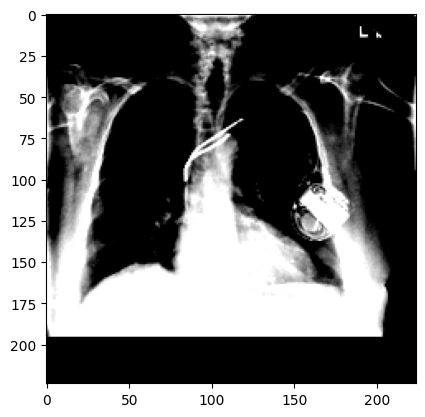

In [29]:
# Check image and image shape
rand_img_idx = random.randint(0, CFG.batch_size)
plt.imshow(next(iter(train_loader))[0][rand_img_idx].permute(1, 2, 0), cmap='gray')
next(iter(train_loader))[0][rand_img_idx].shape

# 3. Timm Optimizer

In [30]:
from timm import optim

In [31]:
help(optim.create_optimizer)

Help on function create_optimizer in module timm.optim.optim_factory:

create_optimizer(args, model, filter_bias_and_bn=True)
    Legacy optimizer factory for backwards compatibility.
    NOTE: Use create_optimizer_v2 for new code.



In [32]:
help(optim.create_optimizer_v2)

Help on function create_optimizer_v2 in module timm.optim.optim_factory:

create_optimizer_v2(model_or_params, opt: str = 'sgd', lr: Union[float, NoneType] = None, weight_decay: float = 0.0, momentum: float = 0.9, filter_bias_and_bn: bool = True, layer_decay: Union[float, NoneType] = None, param_group_fn: Union[Callable, NoneType] = None, **kwargs)
    Create an optimizer.
    
    TODO currently the model is passed in and all parameters are selected for optimization.
    For more general use an interface that allows selection of parameters to optimize and lr groups, one of:
      * a filter fn interface that further breaks params into groups in a weight_decay compatible fashion
      * expose the parameters interface and leave it up to caller
    
    Args:
        model_or_params (nn.Module): model containing parameters to optimize
        opt: name of optimizer to create
        lr: initial learning rate
        weight_decay: weight decay to apply in optimizer
        momentum:  mom

In [33]:
timm_opt = optim.create_optimizer_v2(
    model_or_params=timm_test_model.parameters(), 
    opt='adam', 
    lr=0.01, 
    weight_decay=0.01
)
timm_opt

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    eps: 1e-08
    foreach: None
    lr: 0.01
    maximize: False
    weight_decay: 0.01
)

# 4. Train & Visualization

### 4.1 Train model

In [34]:
# Set model for training
model = timm_custom_model # Using 
model.to(CFG.device)

# Set loss function and optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.create_optimizer_v2(
    model.parameters(),
    opt='adam',
    lr=0.001,
    weight_decay=0.01,
)

In [35]:
# training
print ('Start Training')
print ('-'*30)

best_val_roc_auc = 0 
for epoch in range(5):
    # Trian loop
    model.train()
    
    for idx, data in enumerate(train_loader):
        train_data, train_labels = data
        train_data, train_labels  = train_data.to(CFG.device), train_labels.to(CFG.device)
        y_pred = model(train_data)
        y_pred = torch.sigmoid(y_pred) # Using sigmoid due to the CrossEntropy loss function
        loss = criterion(y_pred, train_labels) 
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # validation loop
        if idx % 400 == 0:
            model.eval()
            with torch.no_grad():    
                val_pred = []
                val_true = [] 
                for jdx, data in enumerate(val_loader):
                    val_data, val_labels = data
                    val_data = val_data.to(CFG.device)
                    y_pred = model(val_data)
                    y_pred = torch.softmax(y_pred, dim=1) # Using softmax due to the roc-auc scoring
                    val_pred.append(y_pred.cpu().detach().numpy())
                    val_true.append(val_labels.numpy())

                val_true = np.concatenate(val_true)
                val_pred = np.concatenate(val_pred)
                val_roc_auc = roc_auc_score(val_true, val_pred, average='macro', multi_class='ovr')

                if best_val_roc_auc < val_roc_auc:
                    best_val_roc_auc = val_roc_auc
                    torch.save(model.state_dict(), 'model_timm_intro.pth')

                print ('Epoch=%s, BatchID=%s, Val_ROC_AUC=%.4f, Best_Val_ROC_AUC=%.4f'%(epoch, idx, val_roc_auc, best_val_roc_auc))

Start Training
------------------------------
Epoch=0, BatchID=0, Val_ROC_AUC=0.8247, Best_Val_ROC_AUC=0.8247
Epoch=0, BatchID=400, Val_ROC_AUC=0.5000, Best_Val_ROC_AUC=0.8247
Epoch=0, BatchID=800, Val_ROC_AUC=0.4835, Best_Val_ROC_AUC=0.8247
Epoch=0, BatchID=1200, Val_ROC_AUC=0.5000, Best_Val_ROC_AUC=0.8247
Epoch=0, BatchID=1600, Val_ROC_AUC=0.5000, Best_Val_ROC_AUC=0.8247
Epoch=0, BatchID=2000, Val_ROC_AUC=0.5000, Best_Val_ROC_AUC=0.8247
Epoch=0, BatchID=2400, Val_ROC_AUC=0.5000, Best_Val_ROC_AUC=0.8247
Epoch=0, BatchID=2800, Val_ROC_AUC=0.5000, Best_Val_ROC_AUC=0.8247
Epoch=0, BatchID=3200, Val_ROC_AUC=0.4835, Best_Val_ROC_AUC=0.8247
Epoch=0, BatchID=3600, Val_ROC_AUC=0.4917, Best_Val_ROC_AUC=0.8247
Epoch=0, BatchID=4000, Val_ROC_AUC=0.5165, Best_Val_ROC_AUC=0.8247
Epoch=0, BatchID=4400, Val_ROC_AUC=0.5083, Best_Val_ROC_AUC=0.8247
Epoch=0, BatchID=4800, Val_ROC_AUC=0.5000, Best_Val_ROC_AUC=0.8247
Epoch=0, BatchID=5200, Val_ROC_AUC=0.5000, Best_Val_ROC_AUC=0.8247
Epoch=0, BatchID=5600

### 4.2 Predict validation set

In [36]:
# Load best model
best_model = timm.create_model('efficientnet_b0', pretrained=False, num_classes=3)
best_model.load_state_dict(torch.load('./model_timm_intro.pth'))
best_model.to(CFG.device)
best_model.eval()

EfficientNet(
  (conv_stem): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (bn1): BatchNormAct2d(
    32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
    (drop): Identity()
    (act): SiLU(inplace=True)
  )
  (blocks): Sequential(
    (0): Sequential(
      (0): DepthwiseSeparableConv(
        (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
        (bn1): BatchNormAct2d(
          32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
          (drop): Identity()
          (act): SiLU(inplace=True)
        )
        (se): SqueezeExcite(
          (conv_reduce): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
          (act1): SiLU(inplace=True)
          (conv_expand): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
          (gate): Sigmoid()
        )
        (conv_pw): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn2): BatchNormAct2d(
      

In [37]:
# Load dataset with image path for visualization
viz_dataset = ImageDataset(df_val_new, 'heatmap')

viz_loader = DataLoader(viz_dataset,
                        batch_size=CFG.batch_size,
                        num_workers=CFG.num_workers,
                        shuffle=False,
                        drop_last=False)

In [38]:
# Predict
with torch.no_grad():    
    viz_img_data = []
    viz_true = [] 
    viz_pred_prob = []
    viz_pred = []
    viz_path_list = []
    for idx, data in enumerate(viz_loader):
        viz_data, viz_path, viz_labels = data
        viz_data = viz_data.to(CFG.device)
        y_pred = best_model(viz_data)
        y_pred = torch.softmax(y_pred, dim=1) # Using softmax due to the roc-auc scoring
        
        # logging
        viz_img_data.append(viz_data.cpu().detach().numpy())
        viz_true.append(viz_labels.numpy())
        viz_pred_prob.append(y_pred.cpu().detach().numpy())
        viz_path_list.append(viz_path) 

    viz_img_data = np.concatenate(viz_img_data)
    viz_true = np.concatenate(viz_true)
    viz_path_list = np.concatenate(viz_path_list)
    viz_pred_prob = np.concatenate(viz_pred_prob)
    viz_pred = np.argmax(viz_pred_prob, axis=1)
    viz_roc_auc = roc_auc_score(viz_true, viz_pred_prob, average='macro', multi_class='ovr')

### 4.3 Visualize prediction result

[6, 7, 8, 23, 50, 55, 59, 108, 129, 143, 151, 154]

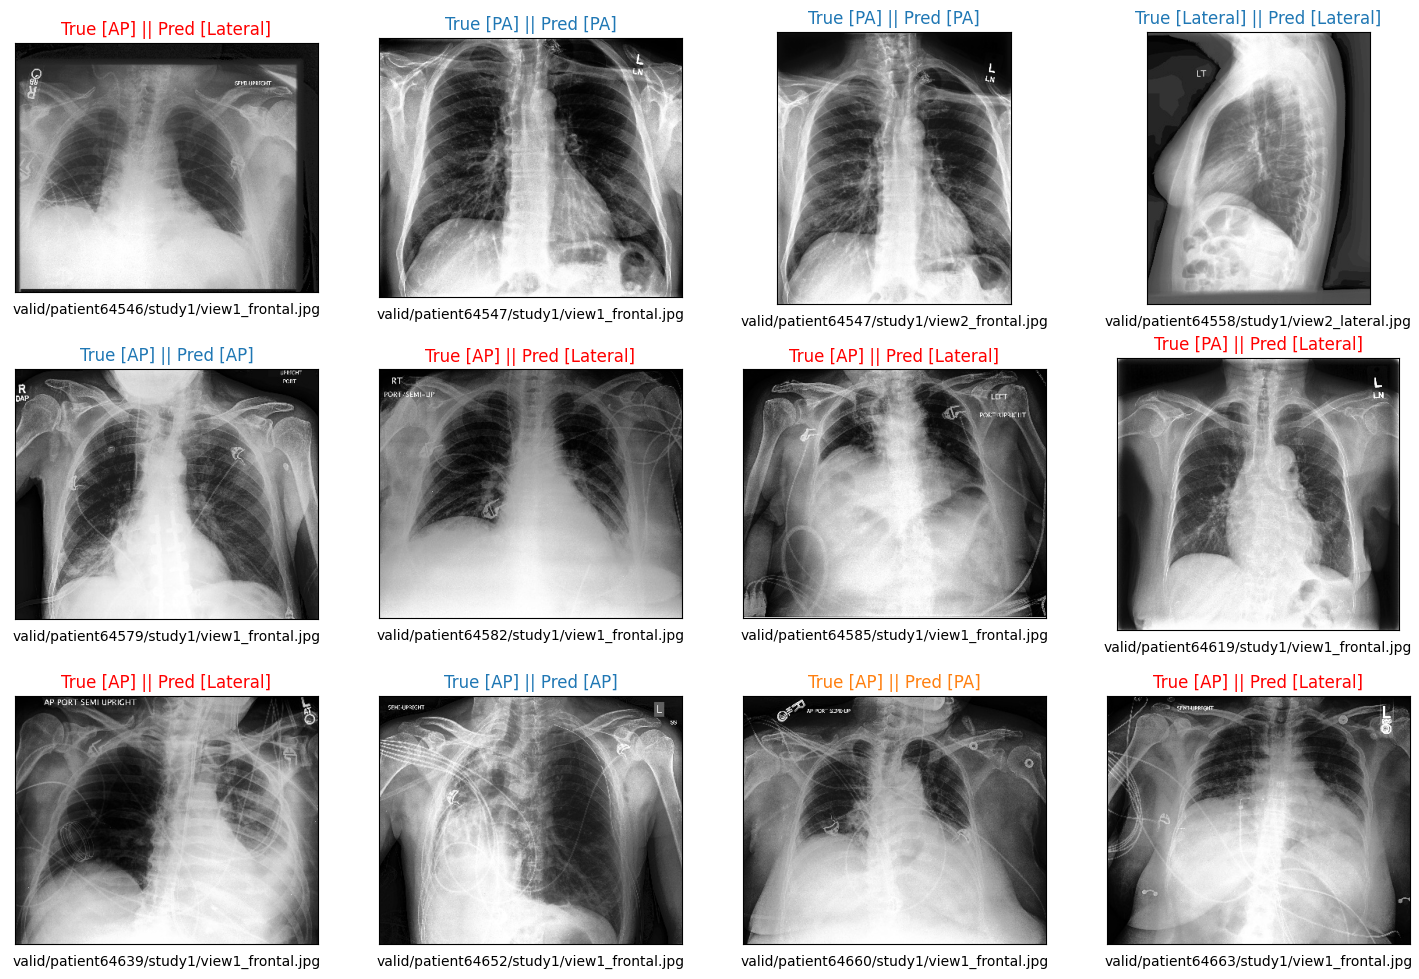

In [40]:
# Plot - prediction result by random sampling
def multi_CXR_plot(num_rows, num_cols):
    # Random sampling
    num_smp = num_rows*num_cols
    smp_idx = sorted(random.sample(list(np.arange(0, len(viz_true))), num_smp))
    
    true_label = pd.Series(viz_true).map({0:'AP', 1:'PA', 2:'Lateral'}).values[smp_idx]
    pred_label = pd.Series(viz_pred).map({0:'AP', 1:'PA', 2:'Lateral'}).values[smp_idx]
    
    # Make figure
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(6*num_rows, 3*num_cols))
    
    axes = axes.flatten()
    for i, ax in enumerate(axes):
        # img = viz_img_data[smp_idx[i]].transpose(1, 2, 0) # Display image that the model seen
        img = Image.open(os.path.join(CFG.root, viz_path_list[smp_idx[i]])) # Display original image
        
        ax.imshow(img, cmap='gray')
        ax.set_yticks([])
        ax.set_xticks([])
        
        if true_label[i] == pred_label[i]:
            ax.set_title(f'True [{true_label[i]}] || Pred [{pred_label[i]}]', color='tab:blue')
        elif (true_label[i] == 'AP' and pred_label[i] == 'PA') or (true_label[i] == 'PA' and pred_label[i] == 'AP'):
            ax.set_title(f'True [{true_label[i]}] || Pred [{pred_label[i]}]', color='tab:orange')
        else:
            ax.set_title(f'True [{true_label[i]}] || Pred [{pred_label[i]}]', color='red')

        ax.set_xlabel(f'{"/".join(viz_path_list[smp_idx][i].split("/")[1:])}', fontsize=10) # Tag image path 
            
    return smp_idx
    
multi_CXR_plot(3, 4)